# Import necessary libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset

In [31]:
df = pd.read_csv("../data/winequality-red.csv")
print("Data Loaded Successfully")

Data Loaded Successfully


In [32]:
# STEP 3: Explore the data
def highlight_header(s):
    return ['background-color: lightblue' for _ in s]

df.head().style.set_table_styles(
    [{'selector': 'th', 'props': [('background-color', 'lightblue'), 
                                  ('color', 'black'),
                                  ('font-weight', 'bold')]}]
).set_caption("Top 5 Rows of DataFrame")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,5
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,5
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,6
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5


In [33]:
# Dataset Info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [34]:
# Summary statistic
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [35]:
# missing values
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


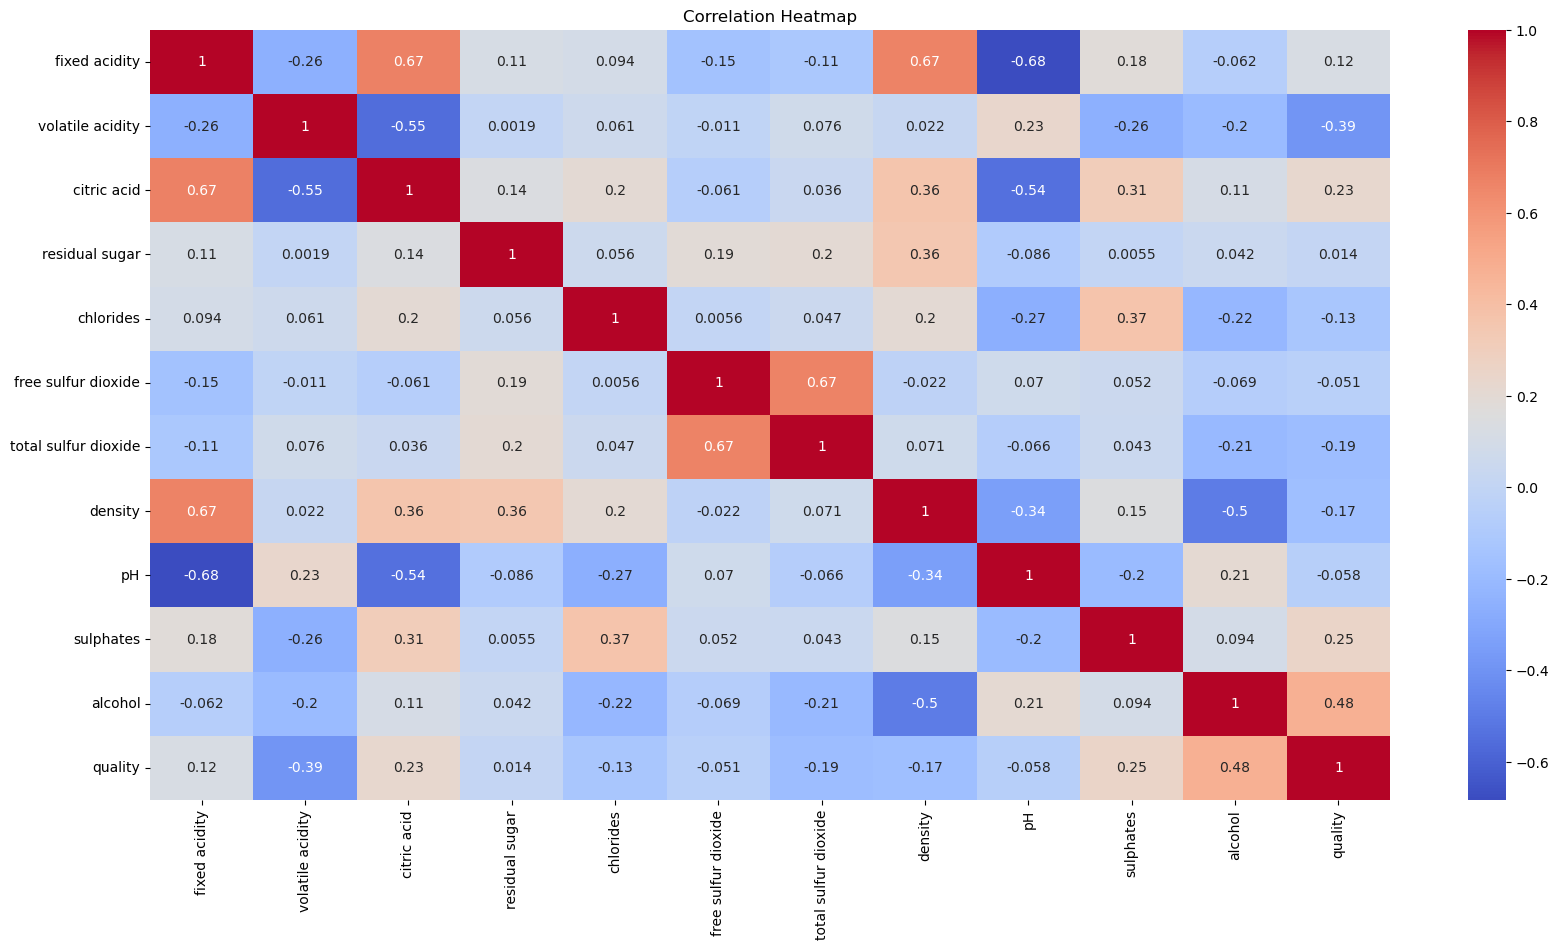

In [36]:
# 📊 STEP 4: Visualize the data
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

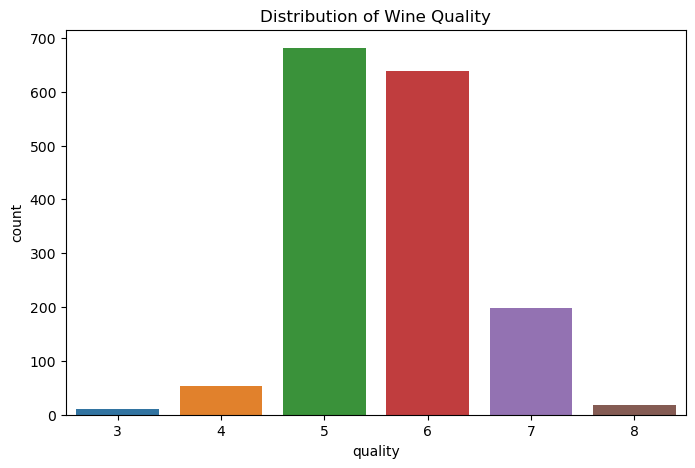

In [37]:
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=df)
plt.title("Distribution of Wine Quality")
plt.show()

In [38]:
# STEP 5: Preprocess the data
X = df.drop("quality", axis=1)
y = df["quality"]

In [39]:
# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model

In [45]:
# Train a Machine Learning Model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [43]:
# Define the model
model = RandomForestRegressor(random_state=42)

from sklearn.model_selection import GridSearchCV

# Define hyperparameters to try
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Search across parameters
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', n_jobs=-1)

# Train
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Evaluate
y_pred = best_model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error

print("Best R² Score:", r2_score(y_test, y_pred))
print("Best MSE:", mean_squared_error(y_test, y_pred))

Best R² Score: 0.5307156545807452
Best MSE: 0.3066800694444445


In [46]:
# 🧪 STEP 7: Evaluate the model
y_pred = model.predict(X_test)

print("\n🔍 Model Evaluation:")
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


🔍 Model Evaluation:
R² Score: 0.5399271357910311
Mean Squared Error: 0.3006603124999999


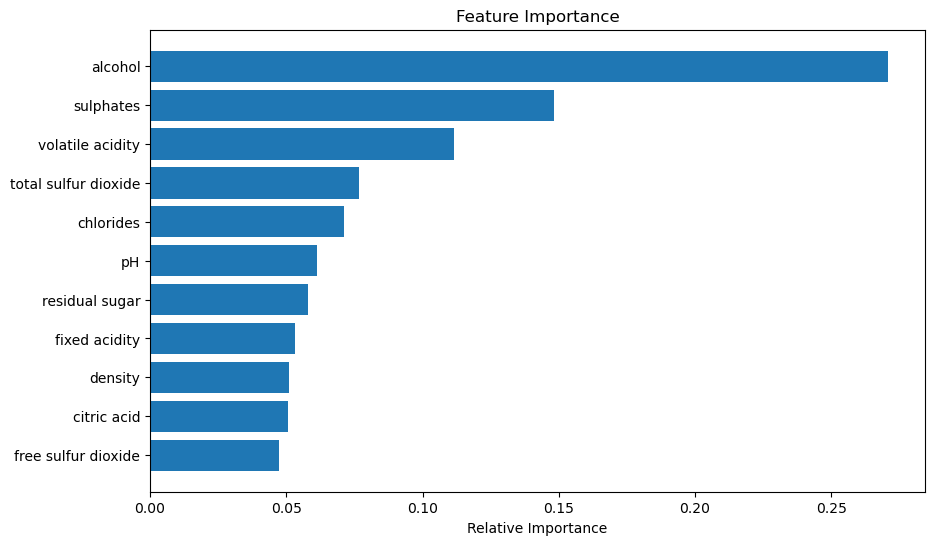

In [22]:
# 📈 STEP 8: Feature Importance
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [23]:
# 💾 STEP 9: Save the model
import joblib
joblib.dump(model, 'wine_quality_model.pkl')
print("💾 Model saved as 'wine_quality_model.pkl'")

💾 Model saved as 'wine_quality_model.pkl'
